In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import warnings
warnings.simplefilter('ignore')

# Cloud Correction

Using the cloud masks, correct the already extracted masked farm data. 

In [2]:
import sys
sys.path.append('../')

import numpy as np
import pandas as pd
import rasterio

from tqdm import tqdm
from config import interim_data_dir

from src.utils import read_shapefile, mask_raster
from src.data.vi_methods import calc_ndvi, calc_vi_ts

dates_with_clouds = ['2017-02-10','2017-08-04','2017-08-19']

In [3]:
train_shp = read_shapefile('train')

## Develop Cloud Correction Functions

In [4]:
def load_for_id(farm_id, dataset, bands_subset=None):
    """
    Load all data for a farm
    
    Return:
    
    dictionary: {band: {date: ndarray}, {...}}
    """
    farm_dir = interim_data_dir / 'masks_resampled' / dataset / str(farm_id)

    dates = farm_dir.glob('*/')
    farm_data = {}
    
    for date_path in dates:
        
        date = date_path.stem

        bands = date_path.glob("*.npy")
        
        farm_data[date_path.stem] = {}
        
        for band_path in bands:
            band = band_path.stem
            
            if bands_subset and band in bands_subset:
                arr = np.load(band_path)
                farm_data[date][band] = arr
            else:
                continue
        
    return farm_data


In [5]:
dates_with_clouds = [
    '2017-02-10',
    '2017-08-04',
    '2017-08-19'
]

def get_cloud_masks(shapes):
    """
    Get cloud masks for all farms 
    for all dates
    """
    cloud_masks = {}
    
    for date in dates_with_clouds:
    
        f_mask = interim_data_dir / 'cloud_masks' / date / 'mask_10m.jp2'

        with rasterio.open(f_mask) as cloud_raster:
            cloud_masks[date] = mask_raster(shapes, cloud_raster)
    
    return cloud_masks


def cloud_correction(farm_data, farm_id, cloud_masks, bands):
    for date, cloud_mask_dict in cloud_masks.items():
        for band in bands:
            # replace with nan where mask is 1
            farm_data[date][band] = np.where(cloud_mask_dict[farm_id] == 1, np.nan, farm_data[date][band])
            

## Get VI with/without cloud correction

In [33]:
bands_subset=['B04','B08','B05']
agg_methods = ['mean','median']
vi_methods = ['ndvi']
ID = 293
farm_data = load_for_id(ID, 'train', bands_subset=bands_subset)

# before
vi_data = [calc_vi_ts(farm_data, ID, agg_methods, vi_method) for vi_method in vi_methods]

vi_df_before = pd.concat(vi_data, axis=1)

cloud_masks = get_cloud_masks(train_shp.geometry)

cloud_correction(farm_data, ID, cloud_masks, bands_subset)

# after
vi_data = [calc_vi_ts(farm_data, ID, agg_methods, vi_method) for vi_method in vi_methods]

vi_df_after = pd.concat(vi_data, axis=1)

In [34]:
cloud_masks['2017-02-10'][ID]

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [35]:
farm_data['2017-02-10']['B04']

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Show VI plots before / after cloud correction

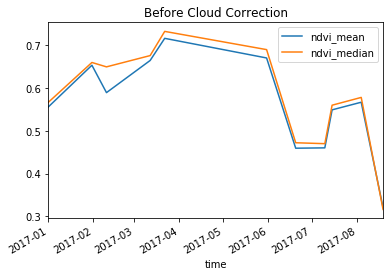

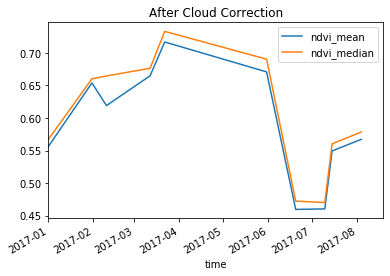

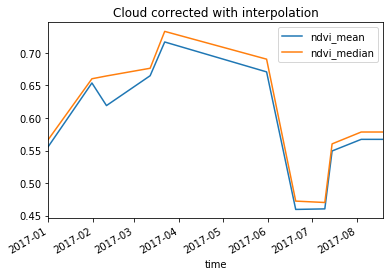

In [36]:
vi_df_before.sort_index(level=1).loc[ID].plot(title='Before Cloud Correction')
vi_df_after.sort_index(level=1).loc[ID].plot(title='After Cloud Correction')
vi_df_after.sort_index(level=1).interpolate(axis=0, method='linear').loc[ID].plot(title='Cloud corrected with interpolation')

### A list of farms with clouds on 2017-02-10

In [ ]:
farms_with_clouds = [14,
 15,
 96,
 119,
 122,
 234,
 238,
 240,
 241,
 245,
 246,
 252,
 253,
 255,
 256,
 270,
 293,
 294,
 296,
 297,
 300,
 445,
 511,
 513,
 515,
 516,
 517,
 519,
 521,
 522,
 523,
 525,
 526,
 527,
 528,
 529,
 530,
 531,
 533,
 537,
 538,
 541,
 543,
 545,
 546,
 547,
 551,
 552,
 553,
 555,
 577,
 578,
 579,
 586,
 588,
 589,
 590,
 591,
 592,
 593,
 594,
 595,
 596,
 598,
 601,
 604,
 605,
 606,
 607,
 608,
 609,
 610,
 611,
 659,
 662,
 1033,
 1037,
 1038,
 1040,
 1041,
 1288,
 1291,
 1562,
 1565,
 1568,
 1570,
 1572,
 1574,
 1575,
 1576,
 1581,
 1582,
 1585,
 1586,
 1587,
 1588,
 1589,
 1599,
 1670,
 1792,
 2115,
 2120,
 2157,
 2162,
 2163,
 2164,
 2165,
 2167,
 2168,
 2171,
 2174,
 2175,
 2176,
 2177,
 2178,
 2179,
 2180,
 2181,
 2182,
 2183,
 2402,
 2403,
 2416,
 2419,
 2438,
 2447,
 2450,
 2451,
 2452,
 2454,
 2702,
 2703,
 2704,
 2713,
 2717,
 2718,
 2719,
 2720,
 2723,
 2724,
 2731,
 2736,
 2880,
 2881,
 2883,
 2887,
 2888,
 2890,
 2892,
 2893,
 2894,
 2895,
 2896,
 3099,
 3100,
 3102,
 3105,
 3232,
 3430,
 3432,
 3501,
 3502,
 3548,
 3566,
 3586,
 3587]